In [1]:
import matplotlib.pyplot as plt
import numpy as np
import hit
import device
from main import correlate, plot_events

In [2]:
dut_1 = {
    'column': 1152,
    'row': 576,
    'column_pitch': 18.4,
    'row_pitch': 18.4,
    'thickness': 50,
    'z_position': 0,
    'delta_x': 100,
    'delta_y': 0
}

dut_2 = {
    'column': 1152,
    'row': 576,
    'column_pitch': 18.4,
    'row_pitch': 18.4,
    'thickness': 50,
    'z_position': 30000,
    'delta_x': 0,
    'delta_y': 0
}

dut_3 = {
    'column': 1152,
    'row': 576,
    'column_pitch': 18.4,
    'row_pitch': 18.4,
    'thickness': 50,
    'z_position': 70000,
    'delta_x': 0,
    'delta_y': 0
}

dut_4 = {
    'column': 1152,
    'row': 576,
    'column_pitch': 18.4,
    'row_pitch': 18.4,
    'thickness': 50,
    'z_position': 120000,
    'delta_x': 0,
    'delta_y': 0
}


beam = {
    'energy': 100,
    'sigma_x': 2000,
    'sigma_y': 2000,
    'loc_x': 0,
    'loc_y': 0,
    'x_disp': 0.005,
    'y_disp': 0.005,
    'x_angle': 0,
    'y_angle': 0,
    'nmb_particles': 10000,
    'particle_rate': 5000
}


In [3]:
folder = '/home/rasmus/Documents/pieces of interest/output_pytestbeam/'

devicess = [dut_1, dut_2, dut_3, dut_4]
hit_tables = hit.tracks(beam, devicess)
device.calculate_device_hit(beam, devicess, hit_tables, folder)

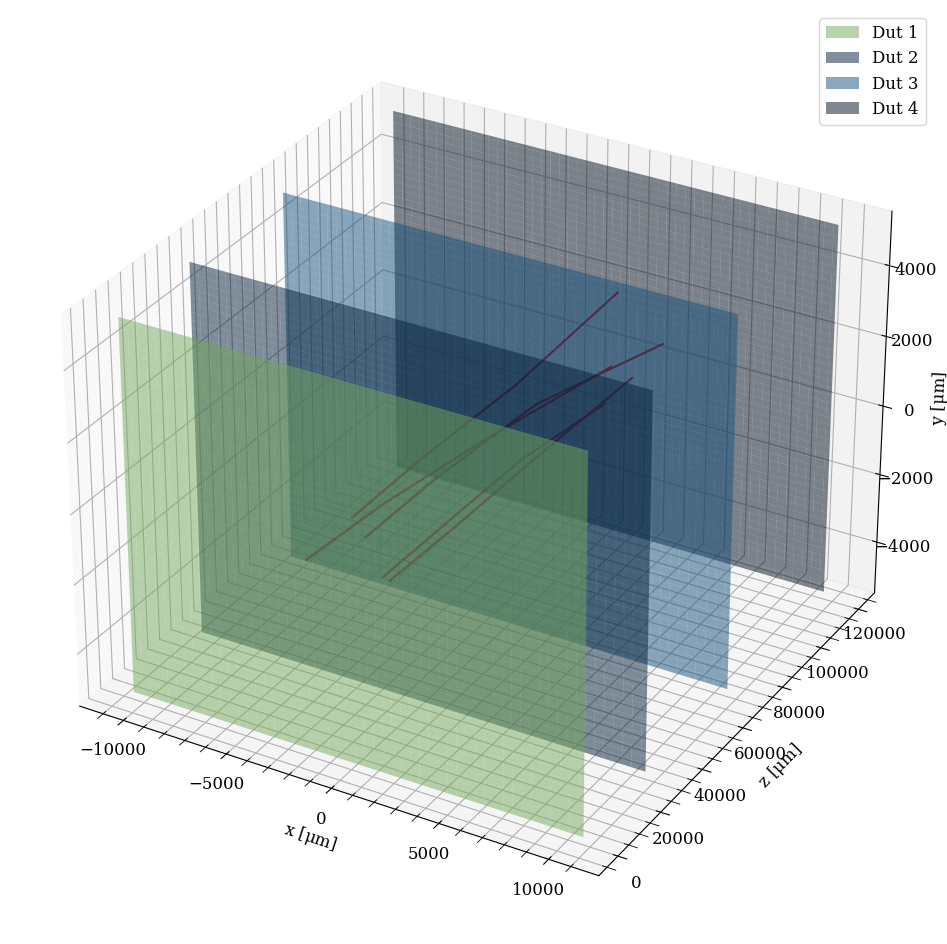

In [4]:
plot_events(devicess, hit_tables, np.arange(60, 65, 1))

In [5]:
# fiel_dut_1 = '/home/rasmus/Documents/pieces of interest/output_pytestbeam/1_dut.h5'
# fiel_dut_2 = '/home/rasmus/Documents/pieces of interest/output_pytestbeam/2_dut.h5'

# correlate(fiel_dut_1, fiel_dut_2, dut_2, dut_3)